# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.016753e+01     1.057371e+01
 * time: 0.0019791126251220703
     1     2.730632e+01     4.115948e+00
 * time: 0.007533073425292969
     2     1.852689e+01     3.666741e+00
 * time: 0.01516103744506836
     3     1.239587e+01     2.328186e+00
 * time: 0.02087998390197754
     4     1.045721e+01     1.326646e+00
 * time: 0.02504897117614746
     5     9.543774e+00     1.904822e+00
 * time: 0.028532028198242188
     6     9.121914e+00     8.515724e-01
 * time: 0.07162094116210938
     7     8.877284e+00     1.002606e+00
 * time: 0.07562994956970215
     8     8.641586e+00     6.964095e-01
 * time: 0.07966494560241699
     9     8.406029e+00     5.591126e-01
 * time: 0.08332204818725586
    10     8.254815e+00     5.411912e-01
 * time: 0.0870211124420166
    11     8.175025e+00     4.714743e-01
 * time: 0.09076094627380371
    12     8.122196e+00     3.946181e-01
 * time: 0.09445500373840332
    13     8.085787e+00     4.398713e-01
 * ti

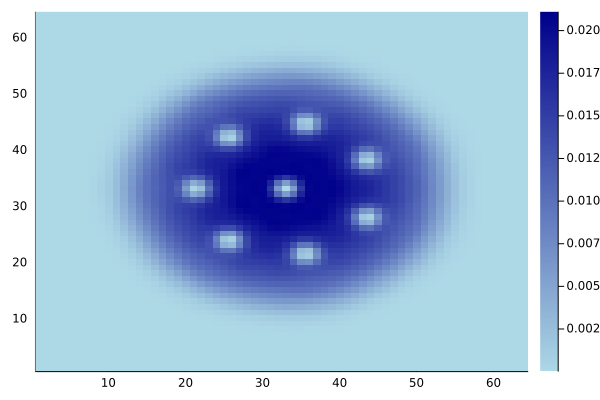

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)